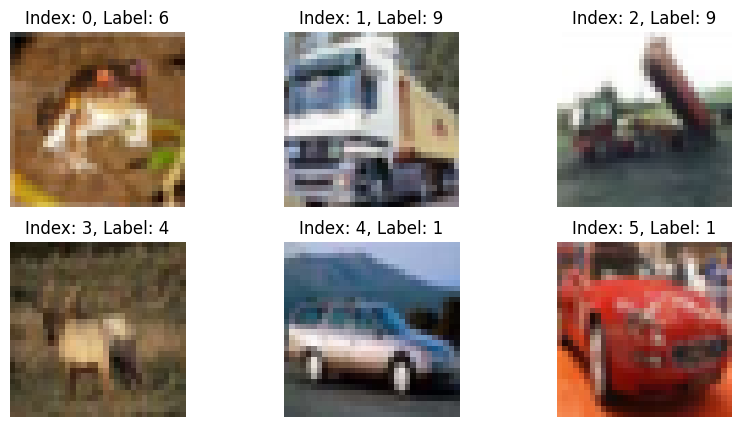

In [35]:
# %% Veri seti hazirlama
from keras.datasets import cifar10 # veri seti yukle
from keras.utils import to_categorical # kategorik verilere cevirme
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential #Sirali Model
from keras.layers import Dense, Flatten #Bagli katmanlar ve flatten
from keras.models import load_model # model yukleme

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Veri seti yukle
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

plt.figure(figsize = (10,5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Index: {i}, Label: {y_train[i][0]}")
    plt.axis("off")

plt.show()

# normalization 0 ile 1 arasina scale etme
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# one hot encoding
y_train = to_categorical(y_train, 10) # 10 = sinif sayisi
y_test = to_categorical(y_test, 10)

In [36]:
# %% ann modelin olusturulmasi ve derlenmesi
model = Sequential()
model.add(Flatten(input_shape = (32,32,3))) # 3D -> 1D
model.add(Dense(512, activation = "relu")) # Ilk katman, 512 cell, relu aktivasyon fonk. var
model.add(Dense(512, activation = "tanh")) # Ikıncı katman, 512 cell, tenh aktivasyon fonk. var
model.add(Dense(10, activation = "softmax")) # Output layer
model.summary()

# modelin derlenmesi
model.compile(optimizer = "adam", # buyuk veri ve kompleks aglar icin idealdir
              loss = "categorical_crossentropy", #loss
              metrics = ["accuracy"]) # dogruluk

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,841,162 (7.02 MB)

 Trainable params: 1,841,162 (7.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# %% callback fonksiyonlarinin tanimlanmasi ve modelin egitilmesi

# early stopping = erken durdurma

# monitor = dogrulama setindeki(val) kaybi (loss) izler
# patience: 5 epoch boyunca val loss degismiyorsa erken durdurma yapalım
# restore_best_weights = en iyi modelin agirliklarini geri yukler
early_stopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights=True)

# model chechpoint = en iyiy modelin agirliklarini kaydeder
checkpoint = ModelCheckpoint("ann_best_model.keras",monitor = "val_loss", save_best_only = True)

# model training: 10 epoch, batch_Size = 60, val set = train setin %20
history = model.fit(x_train,y_train, #train veri seti
                   epochs = 10, # model toplamda 10 kere veri setni görecek, yani veri seti 10 kere train edilecek
                   batch_size = 60, # veri seti 60 arli parcalar ile egitilecek
                   validation_split = 0.2, #v egitim verisinin %20 si dogrulama olarak kullanilacak
                   callbacks = [early_stopping,checkpoint])

Epoch 1/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.2418 - loss: 2.1512 - val_accuracy: 0.3591 - val_loss: 1.7801
Epoch 2/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.3710 - loss: 1.7439 - val_accuracy: 0.3673 - val_loss: 1.7515
Epoch 3/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.4155 - loss: 1.6271 - val_accuracy: 0.4258 - val_loss: 1.6106
Epoch 4/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.4434 - loss: 1.5573 - val_accuracy: 0.4216 - val_loss: 1.6344
Epoch 5/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.4617 - loss: 1.5148 - val_accuracy: 0.4484 - val_loss: 1.5365
Epoch 6/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.4707 - loss: 1.4709 - val_accuracy: 0.4690 - val_loss: 1.5062
Epoch 7/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.4858 - loss: 1.4271 - val_accuracy: 0.4765 - val_loss: 1.4896
Epoch 8/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.5047 - loss: 1.3739 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4772 - loss: 1.4601
Test loss: 1.4661966562271118, test_acc: 0.4749000072479248


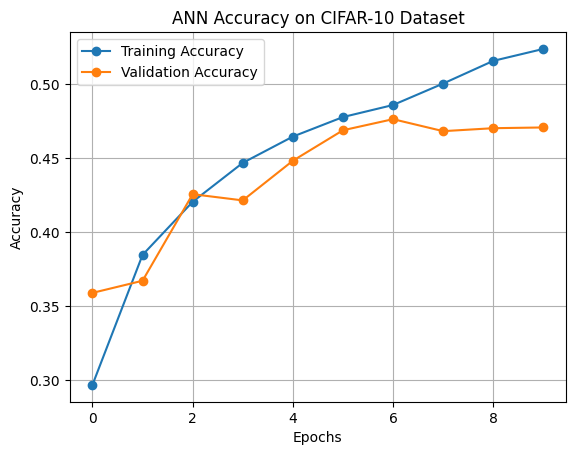

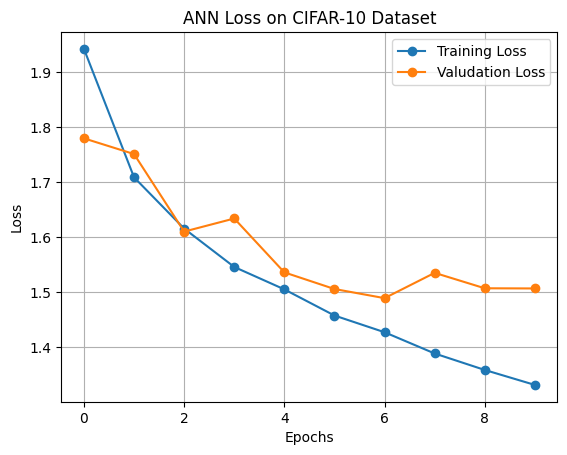

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4772 - loss: 1.4601
Test loss: 1.4661966562271118, test_acc: 0.4749000072479248


In [54]:
# %% modelin test edilmesi ve performansinin incelenmesi

#model performance evaluation with test dataset
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test loss: {test_loss}, test_acc: {test_acc}")

#training and valudation accuracy visualization
plt.figure()
plt.plot(history.history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.title("ANN Accuracy on CIFAR-10 Dataset")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# training and validation loss visualization
plt.figure()
plt.plot(history.history["loss"],marker = "o", label = "Training Loss")
plt.plot(history.history["val_loss"], marker = "o", label = "Valudation Loss")
plt.title("ANN Loss on CIFAR-10 Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Modeli Kaydet
model.save("final_cifar10_ann_model.keras")

# load model
loaded_model = load_model("final_cifar10_ann_model.keras")

test_loss, test_acc = loaded_model.evaluate(x_test,y_test)
print(f"Test loss: {test_loss}, test_acc: {test_acc}")